# Laboratório 4 - Notebook do aluno

## Visão geral

Neste laboratório, você vai preparar um conjunto de dados (dataset) para criar uma previsão (forecast) usando o Amazon Forecast.

Este laboratório inclui dois notebooks Jupyter:

1. Esse notebook contém as etapas que você seguirá para preparar o conjunto de dados (dataset) e avaliar a previsão (forecast).
2. O notebook `forecast-autorun.ipynb` contém as etapas para criar a previsão (forecast) usando o Amazon Forecast. Esse notebook é executado em segundo plano quando o laboratório é iniciado e pode levar entre 1 e 2 horas para ser concluído. Você fará referência a esse notebook durante as etapas do laboratório, mas não precisará executar qualquer célula.


## Sobre o conjunto de dados (dataset)

Este conjunto de dados (dataset) [Online Retail II] (https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) contém todas as transações que ocorreram entre 12 de janeiro de 2009 e 12 de setembro de 2011 para uma organização de varejo on-line, que não é loja, e que está registrada e localizada no Reino Unido A empresa vende principalmente brindes exclusivos ocasionais. Muitos clientes da empresa são atacadistas.


## Informações de atributo

- **InvoiceNo** – Número da fatura. Nominal. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se esse código começar com a letra *c*, indica um cancelamento.
- **StockCode** – Código do produto (item). Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto.
- **Description** (Descrição) – Nome do produto (item). Nominal.
- **Quantity** (Quantidade) – As quantidades de cada produto (item) por transação. Numérico.
- **InvoiceDate** – Data e hora da fatura. Numérico. O dia e a hora em que uma transação foi gerada.
- **UnitPrice** – Preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (£).
- **CustomerID** – Número do cliente. Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente.
- **Country** (País) – Nome do país. Nominal. O nome do país onde um cliente reside.


## Atribuições do conjunto de dados (dataset)

Esse conjunto de dados (dataset) foi obtido de:
Dua, D. e Graff, C. (2019). repositório UCI Machine Learning (http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

## Instruções do laboratório

Para concluir esse laboratório, leia e execute as células abaixo.

## Tarefa 1: Como importar pacotes Python

Comece importando os pacotes necessários do Python.

No código a seguir:

- *boto3* representa o AWS SDK para Python (Boto3), que é a biblioteca Python da AWS
- *pandas* fornece DataFrames para manipular dados de séries temporais
- *matplotlib* fornece funções de plotagem
- *sagemaker* representa a API necessária para trabalhar com o Amazon SageMaker
- *time*,*sys*,*os*,*io* e *json* fornecem funções auxiliares 


In [1]:
import warnings
warnings.filterwarnings('ignore')
bucket_name='c33334a421003l780313t1w17847112420-forecastbucket-1i9vbcsew9lk3'

import boto3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sagemaker
import time, sys, os, io, json


No handlers could be found for logger "sagemaker"


## Tarefa 2: Como fazer download e explorar os dados


Os dados estão no formato *Microsoft Excel*. O pandas pode ler arquivos do Excel.

**Observação:** Esses dados podem levar de 1 a 2 minutos para serem carregados

In [2]:
retail = pd.read_excel('online_retail_II.xlsx')

De acordo com a descrição do conjunto de dados (dataset), faltam alguns valores. Para simplificar, você removerá qualquer item que estiver com valor ausente.

In [3]:
retail = retail.dropna()

Comece examinando os dados.

Quantas linhas e colunas há no conjunto de dados?

In [4]:
retail.shape

(417534, 8)

Quais são os tipos de dados?

In [5]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Qual é a aparência dos dados?

In [6]:
retail.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


O Amazon Forecast tem esquemas para domínios como, por exemplo, varejo. Revise as informações do esquema em [Domínio do varejo](https://docs.aws.amazon.com/forecast/latest/dg/retail-domain.html) na documentação da AWS.

A série temporal de destino são os dados de séries temporais históricos de cada item ou produto vendido pela organização de varejo. Os campos a seguir são obrigatórios:

- **item_id** (string) – um identificador exclusivo do item ou do produto do qual você deseja prever a demanda.
- **timestamp** (timestamp)
- **demand** (float) – o número de vendas desse item no timestamp. Também é o campo de destino para o qual o Amazon Forecast gera uma previsão.



Se você examinar os dados anteriores, há determinadas colunas que não são necessárias para sua investigação. É possível descartar essas colunas. As colunas que você pode descartar são **Invoice** (Fatura),*Description** (Descrição) e **Customer ID** (ID do Cliente). 

**Observação:** É possível que os itens na mesma ordem (conforme mostrado na coluna **Invoice** (Fatura)) possam ter uma correlação que afeta o modelo. Para esse laboratório, você ignorará essa possibilidade.

Remova as colunas desnecessárias.

In [7]:
retail = retail[['StockCode','Quantity','Price','Country','InvoiceDate']]

A coluna **InvoiceDate** (Data da fatura) contém seus dados de data e hora. Você pode informar o pandas sobre isso usando a função `to_datetime`. Você pode explorar os dados por tempo, definindo o índice do DataFrame como a coluna **InvoiceDate** (Data da fatura).

In [8]:
retail['InvoiceDate'] = pd.to_datetime(retail.InvoiceDate)
retail = retail.set_index('InvoiceDate')

Agora, você examinará o DataFrame atualizado.

O número de linhas e colunas é:

In [9]:
retail.shape

(417534, 4)

Os novos dados são semelhantes a este exemplo:

In [10]:
retail.head()

,StockCode,Quantity,Price,Country
InvoiceDate,,,,
2009-12-01 07:45:00,85048,12,6.95,United Kingdom
2009-12-01 07:45:00,79323P,12,6.75,United Kingdom
2009-12-01 07:45:00,79323W,12,6.75,United Kingdom
2009-12-01 07:45:00,22041,48,2.10,United Kingdom
2009-12-01 07:45:00,21232,24,1.25,United Kingdom


Observe que **InvoiceDate** (Data da fatura) é o índice, e é mostrado na primeira coluna.

Como você define o índice para seus dados de data e hora, pode usá-lo para selecionar dados.

Para selecionar todas as linhas de uma data específica, use a data no índice.

In [11]:
retail['2010-01-04']

,StockCode,Quantity,Price,Country
InvoiceDate,,,,
2010-01-04 09:24:00,TEST001,5,4.50,United Kingdom
2010-01-04 09:43:00,21539,-1,4.25,United Kingdom
2010-01-04 09:53:00,TEST001,5,4.50,United Kingdom
2010-01-04 10:28:00,21844,36,2.55,United Kingdom
2010-01-04 10:28:00,21533,12,4.25,United Kingdom
2010-01-04 10:28:00,37508,2,2.55,United Kingdom
2010-01-04 10:28:00,35001G,2,4.25,United Kingdom
2010-01-04 10:28:00,21527,12,6.95,United Kingdom
2010-01-04 10:28:00,21531,24,2.10,United Kingdom


Você pode usar partes de uma data e intervalos de datas. Para visualizar as linhas **Jan** e **Feb** (Fev):

In [12]:
retail['2010-01':'2010-02']

,StockCode,Quantity,Price,Country
InvoiceDate,,,,
2010-01-04 09:24:00,TEST001,5,4.50,United Kingdom
2010-01-04 09:43:00,21539,-1,4.25,United Kingdom
2010-01-04 09:53:00,TEST001,5,4.50,United Kingdom
2010-01-04 10:28:00,21844,36,2.55,United Kingdom
2010-01-04 10:28:00,21533,12,4.25,United Kingdom
2010-01-04 10:28:00,37508,2,2.55,United Kingdom
2010-01-04 10:28:00,35001G,2,4.25,United Kingdom
2010-01-04 10:28:00,21527,12,6.95,United Kingdom
2010-01-04 10:28:00,21531,24,2.10,United Kingdom


O intervalo de datas começa em:

In [13]:
retail.index.min()

Timestamp('2009-12-01 07:45:00')

O intervalo de datas termina em:

In [14]:
retail.index.max()

Timestamp('2010-12-09 20:01:00')

Com o pandas, você pode extrair informações de data facilmente. Você pode extrair informações de data para explorar os dados mais detalhadamente e procurar tendências relacionadas ao tempo.

Extraia o ano, o mês e o dia da semana.

In [15]:
retail['Year'] = retail.index.year
retail['Month'] = retail.index.month
retail['weekday_name'] = retail.index.day_name()

In [16]:
retail.head()

,StockCode,Quantity,Price,Country,Year,Month,weekday_name
InvoiceDate,,,,,,,
2009-12-01 07:45:00,85048,12,6.95,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,79323P,12,6.75,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,79323W,12,6.75,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,22041,48,2.10,United Kingdom,2009,12,Tuesday
2009-12-01 07:45:00,21232,24,1.25,United Kingdom,2009,12,Tuesday


O conjunto de dados (dataset) que você agora tem inclui compras feitas entre dezembro de 2009 e dezembro de 2010. Podemos dizer que existiria alguma sazonalidade nesses dados. Agora você investigará se há sazonalidade.

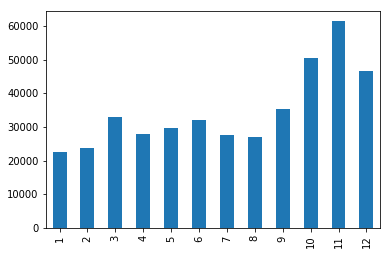

In [17]:
retail.Month.value_counts(sort=False).plot(kind='bar')

A partir do gráfico, você pode deduzir alguma sazonalidade:

1. Novembro e dezembro parecem ser superiores ao resto do ano.

2. T4 parece ser superior que os outros trimestres.

3. Para T1, T2 e T3: o último mês do trimestre (meses 3, 6 e 9) parece ter picos.

Você observa outros padrões sazonais?

Agora, investigue se há alguma sazonalidade durante a semana.

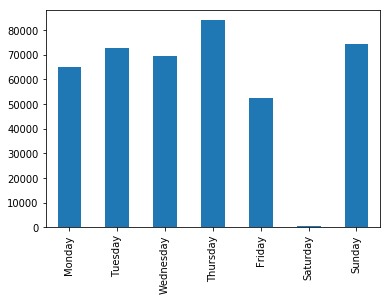

In [18]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
retail.weekday_name.value_counts(sort=False).loc[day_order].plot(kind='bar')

Sábado mostra muito poucos pedidos. Por que este pode ser o motivo?

## Tarefa 3: Como limpar e reduzir o tamanho dos dados

Nesta tarefa, você reduzirá o tamanho dos dados. Você também removerá quaisquer anomalias, como preços negativos, anomalias (outliers) e dados do país.

## Redução de países
Examine os dados do **Country** (País).

In [19]:
retail.Country.unique()

array([u'United Kingdom', u'France', u'USA', u'Belgium', u'Australia',
       u'EIRE', u'Germany', u'Portugal', u'Japan', u'Denmark',
       u'Netherlands', u'Poland', u'Spain', u'Channel Islands', u'Italy',
       u'Cyprus', u'Greece', u'Norway', u'Austria', u'Sweden',
       u'United Arab Emirates', u'Finland', u'Switzerland',
       u'Unspecified', u'Nigeria', u'Malta', u'RSA', u'Singapore',
       u'Bahrain', u'Thailand', u'Israel', u'Lithuania', u'West Indies',
       u'Korea', u'Brazil', u'Canada', u'Iceland'], dtype=object)

In [20]:
retail.Country.value_counts()

United Kingdom          379423
EIRE                      8710
Germany                   8129
France                    5710
Netherlands               2769
Spain                     1278
Switzerland               1187
Belgium                   1054
Portugal                  1024
Channel Islands            906
Sweden                     883
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Korea   

A maioria dos dados parece ser do Reino Unido. Para facilitar o trabalho, filtre os dados por *United Kingdom* (Reino Unido).

In [21]:
country_filter = ['United Kingdom']
retail = retail[retail.Country.isin(country_filter)]

Como a coluna **Country** (País) contém apenas o mesmo valor, você pode descartá-la.

In [22]:
retail = retail[['StockCode','Quantity','Price']]

In [23]:
retail.head()

,StockCode,Quantity,Price
InvoiceDate,,,
2009-12-01 07:45:00,85048,12,6.95
2009-12-01 07:45:00,79323P,12,6.75
2009-12-01 07:45:00,79323W,12,6.75
2009-12-01 07:45:00,22041,48,2.10
2009-12-01 07:45:00,21232,24,1.25


## Como examinar o StockCode e remover anomalias

Examine a distribuição da coluna **StockCode** (Código do produto):

In [24]:
retail.StockCode.describe()

count     379423
unique      4015
top       85123A
freq        3140
Name: StockCode, dtype: object

Existem 4.015 valores exclusivos para **StockCode** (Código do produto). Um gráfico rápido das contagens pode fornecer informações sobre como os valores são distribuídos.

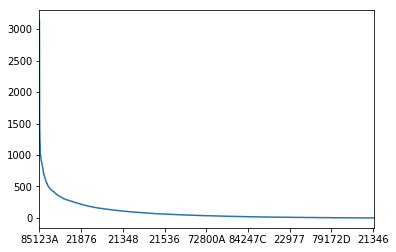

In [25]:
retail.StockCode.value_counts().plot()

Parece que há alguns produtos de alta venda, com uma caracteristica de long tail (número grande de vendas, mas em pequenas quantidades) por trás deles. Você pode investigar essa situação com mais detalhes futuramente. No entanto, por enquanto, examine **Quantity** (Quantidade).

In [26]:
retail.Quantity.describe()

count    379423.000000
mean         11.451517
std          68.943709
min       -9360.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       10000.000000
Name: Quantity, dtype: float64

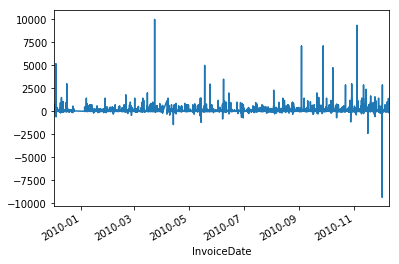

In [27]:
retail.Quantity.plot()

No gráfico inicial, observe alguns aspectos interessantes.

1. Parece haver quantidades negativas.

2. Há picos muito grandes ao longo do ano.


As quantidades negativas e zeradas poderão afetar a previsão, se você não souber o motivo da existência desses valores. Para facilitar as coisas por enquanto, você removerá as quantidades negativas e zeradas

In [28]:
retail = retail[retail.Quantity>0]

Now, examine **Price**.

In [29]:
retail.Price.describe()

count    370951.000000
mean          3.145220
std          30.551482
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

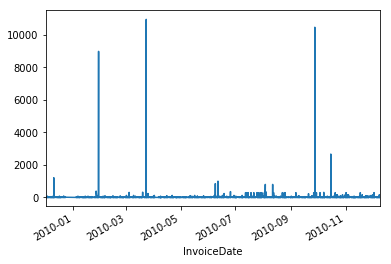

In [30]:
retail.Price.plot()

O gráfico mostra alguns picos claros de preço. Agora, você tentará descobrir o motivo da existência desses picos.

In [31]:
retail[retail.Price>500].head()

,StockCode,Quantity,Price
InvoiceDate,,,
2009-12-10 11:50:00,M,1,1213.02
2010-01-29 11:04:00,M,1,8985.60
2010-03-23 15:22:00,M,1,10953.50
2010-06-08 16:39:00,M,1,849.45
2010-06-11 15:54:00,M,1,1000.63


O valor **StockCode** (Código do produto) de *M* parece incomum. Se você tiver acesso a um especialista em domínio, poderá saber mais sobre a importância do *M*. Como você não pode solicitar um especialista em domínio para este laboratório, descartará tudo que tiver um valor **StockCode** de *M*.

In [32]:
retail = retail[retail.StockCode!='M']

In [33]:
retail.Price.describe()

count    370576.000000
mean          3.009463
std           4.576951
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         387.540000
Name: Price, dtype: float64

Esse resultado é melhor, mas o valor **max** ainda é alto. Você investigará essa situação em mais detalhes futuramente.

In [34]:
retail[retail.Price>300].head(20)

,StockCode,Quantity,Price
InvoiceDate,,,
2010-01-26 16:29:00,ADJUST,1,342.80
2010-01-26 17:28:00,ADJUST,1,387.54
2010-06-25 14:15:00,ADJUST2,1,300.13
2010-06-25 14:15:00,ADJUST2,1,358.47
2010-08-04 11:38:00,POST,1,334.88


Parece que ocorreram alguns ajustes. Você também descartará todos os dados que mostram esses ajustes.

In [35]:
stockcodes = ['ADJUST', 'ADJUST2', 'POST']
retail = retail[~retail.StockCode.isin(stockcodes)]

In [36]:
retail.Price.describe()

count    370554.000000
mean          3.002500
std           4.363688
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         295.000000
Name: Price, dtype: float64

Agora, você examinará itens com preço zero.

In [37]:
retail[retail.Price==0].count

<bound method DataFrame.count of                     StockCode  Quantity  Price
InvoiceDate                                   
2009-12-02 13:34:00     22076        12    0.0
2009-12-03 11:19:00     48185         2    0.0
2009-12-08 15:25:00     22065         1    0.0
2009-12-08 15:25:00     22142        12    0.0
2009-12-15 13:49:00     85042         8    0.0
2009-12-18 14:22:00     21143        12    0.0
2010-01-06 14:54:00     79320        24    0.0
2010-01-15 12:43:00     21533        12    0.0
2010-02-12 14:58:00   TEST001         5    0.0
2010-02-12 15:47:00   TEST001         5    0.0
2010-03-04 11:44:00     21662         1    0.0
2010-04-01 17:13:00     22459         8    0.0
2010-04-01 17:13:00     22458         8    0.0
2010-06-11 11:12:00     21765         1    0.0
2010-06-17 10:12:00     20914         2    0.0
2010-06-24 12:34:00     22423         5    0.0
2010-07-19 13:13:00     22690         6    0.0
2010-09-27 16:59:00    46000M       648    0.0
2010-09-30 12:19:00     222

Não há muitos valores nesses resultados, portanto, você pode descartar itens com preço zero.

In [38]:
retail = retail[retail.Price>0]

### Dividir os dados

Os dados de séries temporais necessários para criar uma previsão exigem um *timestamp*, um *itemId* e um *demand* (demanda). Esses recursos serão mapeados para as colunas **InvoiceDate** (Data da fatura), **StockCode** (Código do produto) e **Quantity** (Quantidade).

Os dados relacionados de séries temporais precisam de um *timestamp*, um *itemId* e um *price* (preço). Esses recursos serão mapeados para as colunas **InvoiceDate** (Data da fatura), **StockCode** (Código do produto) e **Price** (Preço).

Crie os dois DataFrames:

In [39]:
df_time_series = retail[['StockCode','Quantity']]
df_related_time_series = retail[['StockCode','Price']]

### Downsampling

Agora você examinará um único item.

In [40]:
df_time_series[df_time_series.StockCode==21232]['2009-12-01']

,StockCode,Quantity
InvoiceDate,,
2009-12-01 07:45:00,21232,24
2009-12-01 10:49:00,21232,48
2009-12-01 12:13:00,21232,3
2009-12-01 12:14:00,21232,20
2009-12-01 13:31:00,21232,4
2009-12-01 13:37:00,21232,12
2009-12-01 13:43:00,21232,24
2009-12-01 14:19:00,21232,12
2009-12-01 15:26:00,21232,12


Você pode ver vários pedidos para cada dia. Você quer criar uma previsão que prevê a demanda em valores totais diários.

Você deve *fazer downsample* dos dados dos pedidos individuais em um valor total diário.

Os pedidos para cada dia podem ser somados, pois a demanda total para o dia é o valor que você prevê.

O pandas fornece a função `resample` para essa finalidade. `sum` somará a coluna **Quantity** (Quantidade). Você também redefinirá o índice com base no valor **InvoiceDate** (Data da fatura). No entanto, desta vez, será uma data sem a parte do tempo.

**Observação:** Pode levar até 1 minuto para que esse processo seja concluído.

In [41]:
df_time_series = df_time_series.groupby('StockCode').resample('D').sum().reset_index()

In [42]:
df_time_series['InvoiceDate'] = pd.to_datetime(df_time_series.InvoiceDate)
df_time_series = df_time_series.set_index('InvoiceDate')
df_time_series.head()

,StockCode,Quantity
InvoiceDate,,
2009-12-01,10002,12
2009-12-02,10002,0
2009-12-03,10002,7
2009-12-04,10002,25
2009-12-05,10002,0


In [43]:
df_time_series = df_time_series.groupby('StockCode').resample('D').sum().reset_index().set_index(['InvoiceDate'])

Examine o novo DataFrame.

In [44]:
df_time_series[df_time_series.StockCode==21232]


,StockCode,Quantity
InvoiceDate,,
2009-12-01,21232,171
2009-12-02,21232,164
2009-12-03,21232,192
2009-12-04,21232,264
2009-12-05,21232,36
2009-12-06,21232,54
2009-12-07,21232,110
2009-12-08,21232,339
2009-12-09,21232,59


O pedido agora tem uma única entrada para cada dia.

Repita esse processo com os dados de séries temporais relacionados.

In [45]:
df_related_time_series.head()

,StockCode,Price
InvoiceDate,,
2009-12-01 07:45:00,85048,6.95
2009-12-01 07:45:00,79323P,6.75
2009-12-01 07:45:00,79323W,6.75
2009-12-01 07:45:00,22041,2.10
2009-12-01 07:45:00,21232,1.25


In [46]:
df_related_time_series2 = df_related_time_series.groupby('StockCode').resample('D').mean().reset_index().set_index(['InvoiceDate','StockCode'])

In [47]:
df_related_time_series2.head(20)

,,Price
InvoiceDate,StockCode,
2009-12-01,10002,0.85
2009-12-02,10002,NaN
2009-12-03,10002,0.85
2009-12-04,10002,0.85
2009-12-05,10002,NaN
2009-12-06,10002,0.85
2009-12-07,10002,0.85
2009-12-08,10002,NaN
2009-12-09,10002,NaN


**Pergunta:** Por que alguns dos valores anteriores são mostrados como *NaN*?

**Resposta:** Esse produto não tinha pedidos para esses dias e, portanto, não tem preço. Você deve preencher esses valores NaN com um valor numérico?

In [48]:
retail[retail.StockCode == 10002]['2009-12']

,StockCode,Quantity,Price
InvoiceDate,,,
2009-12-01 09:08:00,10002,12,0.85
2009-12-03 13:49:00,10002,1,0.85
2009-12-03 13:49:00,10002,1,0.85
2009-12-03 19:13:00,10002,1,0.85
2009-12-03 20:03:00,10002,4,0.85
2009-12-04 08:46:00,10002,12,0.85
2009-12-04 12:20:00,10002,12,0.85
2009-12-04 17:31:00,10002,1,0.85
2009-12-06 15:24:00,10002,1,0.85


Você pode usar `pad` para encaminhar o preço. O valor anterior será usado para preencher a lacuna de cada valor ausente. 

In [49]:
df_related_time_series3 = df_related_time_series2.groupby('StockCode').pad()

In [50]:
df_related_time_series3.head(20)

,,StockCode,Price
InvoiceDate,StockCode,,
2009-12-01,10002,10002,0.85
2009-12-02,10002,10002,0.85
2009-12-03,10002,10002,0.85
2009-12-04,10002,10002,0.85
2009-12-05,10002,10002,0.85
2009-12-06,10002,10002,0.85
2009-12-07,10002,10002,0.85
2009-12-08,10002,10002,0.85
2009-12-09,10002,10002,0.85


## Tarefa 4: Revisão da criação da previsão

As células a seguir são Markdown. Eles demonstram as chamadas de API necessárias para criar uma previsão (forecast) com base nos dados com os quais você está trabalhando. A criação de uma previsão com o Amazon Forecast envolve três estágios:

1. Criar os conjuntos de dados (datasets) e importar os dados. Esse processo geralmente leva de 5 a 10 minutos.
2. Criação do preditor. Esse processo treina um modelo usando os dados que você forneceu. Leva de 30 a 60 minutos para ser concluído.
3. Criação da previsão (forecast). Esse processo gera uma previsão (forecast) para um item específico usando o preditor. Também leva de 30 a 60 minutos para ser concluído.

Para economizar tempo, quando esse laboratório foi iniciado, o `forecast-autorun.ipynb` também foi executado em segundo plano. O notebook será atualizado com os resultados após a conclusão da execução. Leva cerca de 65 minutos para ser executado, mas pode demorar um pouco mais. Quando você revisar essa célula, a criação da previsão (forecast) deverá estar em andamento. Quando estiver concluído, você analisará o código.

**Observação:** Sinta-se à vontade para revisar o notebook real `forecast-autorun.ipynb`, se quiser mais detalhes. No entanto, certifique-se de não executar nenhuma célula!

### Criação de conjuntos de dados (datasets) e importação de dados

A primeira etapa é criar um grupo de conjuntos de dados (datasets group) da previsão (forecast):

```python
session = boto3.Session()
forecast = session.client(service_name='forecast') 
create_dataset_group_response = forecast.create_dataset_group(DatasetGroupName=dataset_group_name, Domain="RETAIL")
dataset_group_arn = create_dataset_group_response['DatasetGroupArn']
```
    
A função `create_dataset` requer alguns parâmetros:

- **DOMAIN** – este parâmetro especifica o domínio, como *retail* (varejo), que a previsão deve usar.
- **DatasetType** – para dados de séries temporais, este parâmetro será definido como* TARGET_TIME_SERIES*.
- **DatasetName** – este parâmetro especifica o nome do conjunto de dados.
- **DataFrequency** – este parâmetro especifica a frequência. Para o conjunto de dados diário, ele será *D*.
- **Schema** (Esquema) – este parâmetro especifica o esquema do conjunto de dados.

O esquema do conjunto de dados para os dados de séries temporais é:

```python
schema ={
   "Attributes":[
      {
         "AttributeName":"timestamp",
         "AttributeType":"timestamp"
      },
      {
         "AttributeName":"item_id",
         "AttributeType":"string"
      },
      {
         "AttributeName":"demand",
         "AttributeType":"float"
      }
   ]
}
```


O código para criar o conjunto de dados (dataset) é:

```python
time_series_response=forecast.create_dataset(
                    Domain="RETAIL",
                    DatasetType='TARGET_TIME_SERIES',
                    DatasetName='retail_time_series_data',
                    DataFrequency='D', 
                    Schema = schema
)
dataset_arn = time_series_response['DatasetArn']
```
    
Agora que o conjunto de dados está definido, um trabalho é necessário para importar os dados:

```python
ds_import_job_response=forecast.create_dataset_import_job(DatasetImportJobName='retail_import_job',
                                                      DatasetArn=dataset_arn,
                                                      DataSource= data_source,
                                                      TimestampFormat=timestamp_format
                                                     )
```

Observe que *data_source* é um caminho para os dados armazenados no Amazon Simple Storage Service (Amazon S3).

A etapa final é adicionar o conjunto de dados (dataset) ao grupo de conjuntos de dados (datasets group):

```python
forecast.update_dataset_group(DatasetGroupArn=dataset_group_arn, DatasetArns=[dataset_arn])
```
    

O processo de adição de dados ou metadados relacionados é feito da mesma maneira: alterando os nomes, o esquema e o tipo de conjunto de dados (dataset). Embora tenha preparado esses dados, você não os usará no preditor porque o modelo não foi afetado pelos dados adicionais.

### Criação do preditor

A próxima etapa é criar o preditor. O comando `create_predictor` precisa de alguns parâmetros:

- **PredictorName** – este parâmetro especifica o nome que você deseja dar ao preditor.

    ```python
    predictor_name= prefix+'_deeparp_algo'
    ```


- **AlgorithmArn** – este parâmetro é o caminho para o algoritmo que você deseja usar. Neste exemplo, você usará o DeepAR +.

    ```python
    algorithm_arn = 'arn:aws:forecast:::algorithm/Deep_AR_Plus
    ```


- **EvaluationParameters** – este parâmetro permite que você especifique o número e o tamanho das janelas de backtesting. Lembre-se do módulo de que esse parâmetro controla o tamanho e o número de janelas de teste criadas dos dados.

    ```python
    evaluation_parameters= {"NumberOfBacktestWindows": 1, "BackTestWindowOffset": 30}
    ```


- **ForecastHorizon** – quantas unidades devem ser previstas (neste caso, as unidades são dias).

    ```python
    forecast_horizon = 30
    ```


- **InputDataConfig** – este parâmetro especifica os dados, juntamente com dias de férias opcionais.

    ```python
    input_data_config = {"DatasetGroupArn": dataset_group_arn, "SupplementaryFeatures": [ {"Name": "holiday","Value": "UK"} ]}
    ```


- **FeaturizationConfig** – este parâmetro define a frequência, mas também pode ser usado para especificar métodos de preenchimento para dados.

    ```python
    featurization_config= {"ForecastFrequency": dataset_frequency }
    ```

O código para criar o preditor é:

```python
create_predictor_response=forecast.create_predictor(PredictorName = predictor_name,
      AlgorithmArn = algorithm_arn,
      ForecastHorizon = forecast_horizon,
      PerformAutoML = False,
      PerformHPO = False,
      EvaluationParameters= evaluation_parameters, 
      InputDataConfig = input_data_config,
      FeaturizationConfig = featurization_config
     )
```
                                                 
Depois que o preditor for criado, você poderá criar uma previsão (forecast).

### Criação da previsão (forecast)

Para criar a previsão (forecast), use o método `create_forecast`:

```python
predictor_arn = create_predictor_response['PredictorArn']

create_forecast_response=forecast.create_forecast(ForecastName=forecast_Name,
                                                  PredictorArn=predictor_arn)

```

Depois que a previsão (forecast) for gerada, os resultados poderão ser consultados usando o método `query_forecast`:

```python
forecast_response = forecast_query.query_forecast(
    ForecastArn=forecast_arn,
    Filters={"item_id":"22423"}
)
```


## Tarefa 5: Como aguardar a conclusão da criação da previsão (forecast)

A previsão (forecast) agora deve ser criada. Você pode investigar para ver se a criação da previsão (forecast) foi concluída.

Primeiro, crie um método auxiliar (helper method) para mostrar o status.

In [51]:
import sys

class StatusIndicator:
    
    def __init__(self):
        self.previous_status = None
        self.need_newline = False
        
    def update( self, status ):
        if self.previous_status != status:
            if self.need_newline:
                sys.stdout.write("\n")
            sys.stdout.write( status + " ")
            self.need_newline = True
            self.previous_status = status
        else:
            sys.stdout.write(".")
            self.need_newline = True
        sys.stdout.flush()

    def end(self):
        if self.need_newline:
            sys.stdout.write("\n")

Em seguida, crie instâncias da previsão (forecast) e os objetos de consulta da previsão (forecast query objects).

In [52]:
bucket='c33334a421003l780313t1w17847112420-forecastbucket-1i9vbcsew9lk3'

session = boto3.Session() 
forecast = session.client(service_name='forecast') 
forecast_query = session.client(service_name='forecastquery')

Você lerá as variáveis do armazenamento e verificará se a previsão (forecast) foi definida. Depois que a previsão (forecast) for definida, você aguardará até que seu status se torne ativo.

In [2]:

while True:
    %store -r
    is_local = "forecast_arn" in locals()
    if is_local: break
    time.sleep(10)


status_indicator = StatusIndicator()
while True:
    status = forecast.describe_forecast(ForecastArn=forecast_arn)['Status']
    status_indicator.update(status)
    if status in ('ACTIVE', 'CREATE_FAILED'): break
    time.sleep(10)

status_indicator.end()

NameError: name 'time' is not defined

## Tarefa 6: Usar a previsão (forecast)

Neste momento, deve haver uma previsão (forecast) pronta para ser consultada.

Verifique se você obtém dados para o seguinte código de estoque de teste: *21232*

In [3]:
print()
forecast_response = forecast_query.query_forecast(
    ForecastArn=forecast_arn,
    Filters={"item_id":"21232"}
)
print(forecast_response)

()


NameError: name 'forecast_query' is not defined

### Plotagem dos resultados reais

Anteriormente, você dividiu os dados e reteve os valores de *novembro* e *dezembro*. Você plotará esses valores em relação aos valores previstos para o mesmo período.

Você começará lendo os valores de teste de volta em um DataFrame.


In [1]:
actual_df = pd.read_csv(test, names=['InvoiceDate','StockCode','Quantity'])
actual_df['InvoiceDate'] = pd.to_datetime(actual_df.InvoiceDate)
actual_df = actual_df.set_index('InvoiceDate')
actual_df.head()

NameError: name 'pd' is not defined

Verifique se você tem apenas dados para o código de estoque *21232*.

In [2]:
stockcode_filter = ['21232']
actual_df = actual_df[actual_df['StockCode'].isin(stockcode_filter)]

NameError: name 'actual_df' is not defined

In [3]:
actual_df.head()

NameError: name 'actual_df' is not defined

Você pode fazer um gráfico rápido dos dados. Lembre-se de que esses dados são dados de teste, portanto, os valores reais são plotados. Na próxima etapa, você plotará os valores previstos.

In [4]:
actual_df.Quantity.plot()

NameError: name 'actual_df' is not defined

### Plotagem da previsão

Em seguida, você deve converter a resposta JSON do preditor em um DataFrame que possa ser plotado.

Comece obtendo as predições P10.


In [5]:
# Generate DF 
prediction_df_p10 = pd.DataFrame.from_dict(forecast_response['Forecast']['Predictions']['p10'])
prediction_df_p10.head()

NameError: name 'pd' is not defined

Em seguida, plote as predições P10.

In [6]:
# Plot
prediction_df_p10.plot()


NameError: name 'prediction_df_p10' is not defined

O código anterior só recuperou os valores P10 e os colocou em um DataFrame. Agora, conclua o mesmo processo para os valores P50 e P90.


In [7]:
prediction_df_p50 = pd.DataFrame.from_dict(forecast_response['Forecast']['Predictions']['p50'])
prediction_df_p90 = pd.DataFrame.from_dict(forecast_response['Forecast']['Predictions']['p90'])

NameError: name 'pd' is not defined


## Comparação da predição com resultados reais

Depois de obter os DataFrames, a próxima tarefa é plotá-los juntos para determinar a melhor opção.


In [8]:
# Start by creating a DataFrame to house the content. Here, Source will be which DataFrame it came from.
results_df = pd.DataFrame(columns=['timestamp','value','Source'])

results_df.head()

NameError: name 'pd' is not defined



Importe os valores observados para o DataFrame:


In [9]:
import dateutil.parser
for index, row in actual_df.iterrows():
    #clean_timestamp = dateutil.parser.parse(index)
    results_df = results_df.append({'timestamp' : index , 'value' : row['Quantity'], 'Source': 'Actual'} , ignore_index=True)

NameError: name 'actual_df' is not defined

In [10]:
# To show the new DataFrame
results_df.head()

NameError: name 'results_df' is not defined

In [11]:
# Now add the P10, P50, and P90 Values
for index, row in prediction_df_p10.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'Source': 'p10'} , ignore_index=True)
for index, row in prediction_df_p50.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'Source': 'p50'} , ignore_index=True)
for index, row in prediction_df_p90.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'Source': 'p90'} , ignore_index=True)

NameError: name 'prediction_df_p10' is not defined

Ao criar um pivot nos dados, você pode comparar os valores reais P10, P50 e P90.

In [12]:
pivot_df = results_df.pivot(columns='Source', values='value', index="timestamp")
pivot_df

NameError: name 'results_df' is not defined

Os gráficos podem ser mais fáceis de analisar do que os valores brutos.

In [13]:
pivot_df.plot(figsize=(20,10))

NameError: name 'pivot_df' is not defined

## Como examinar os resultados

Possivelmente, no gráfico anterior, você verá pelo menos alguma correlação entre os valores previstos e os valores reais. A correlação pode não ser boa, e pode haver vários motivos para esse resultado:

- As vendas são principalmente no atacado, mas incluem alguns pedidos menores.
- Você reteve dados, o que significa que uma temporada inteira não foi incluída nos dados de treinamento.
- Talvez você tenha perdido a categoria útil ou os dados de promoção de vendas.

Como todos os modelos de machine learning, os resultados são tão bons quanto os dados usados para treinar o modelo. Conforme observado anteriormente, o modelo pode ser melhorado com mais dados.

## Tarefa 7: Limpeza

As células a seguir limpam os recursos que foram criados durante o laboratório.

In [14]:
%store -r

In [15]:
forecast.delete_forecast(ForecastArn=forecast_arn)
time.sleep(60)

forecast.delete_predictor(PredictorArn=predictor_arn)
time.sleep(60)

NameError: name 'forecast' is not defined

In [16]:
forecast.delete_dataset_import_job(DatasetImportJobArn=ds_related_import_job_arn)
forecast.delete_dataset_import_job(DatasetImportJobArn=ds_import_job_arn)
time.sleep(60)

NameError: name 'forecast' is not defined

In [17]:
forecast.delete_dataset(DatasetArn=related_dataset_arn)
forecast.delete_dataset(DatasetArn=dataset_arn)
time.sleep(60)

NameError: name 'forecast' is not defined

In [18]:
forecast.delete_dataset_group(DatasetGroupArn=dataset_group_arn)

NameError: name 'forecast' is not defined